In [13]:
import csv

f = open('LOCAL_PEOPLE_DONG_202112.csv',encoding='utf8')
data = csv.reader(f)
next(data)
data=list(data)
print(len(data))

315456


In [14]:
f2 = open('dong_code.csv',encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data=list(code_data)
print(len(code_data))

424


In [15]:
print(data[0])

['20211201', '00', '11260630', '20187.730500000001', '772.5255', '367.00290000000001', '356.49860000000001', '505.78879999999998', '794.03560000000004', '698.41039999999998', '874.6875', '826.36659999999995', '800.13080000000002', '747.32209999999998', '859.51099999999997', '580.64049999999997', '464.51679999999999', '1023.0234', '535.17619999999999', '254.88489999999999', '450.84800000000001', '694.97590000000002', '844.40880000000004', '785.68020000000001', '885.24639999999999', '661.53989999999999', '774.77639999999997', '823.51289999999995', '917.47479999999996', '796.30510000000004', '706.61019999999996', '1385.8293000000001', '']


In [23]:
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])
print(data[0])

['20211201', 0, 11260630, 20187.7305, 772.5255, 367.0029, 356.4986, 505.7888, 794.0356, 698.4104, 874.6875, 826.3666, 800.1308, 747.3221, 859.511, 580.6405, 464.5168, 1023.0234, 535.1762, 254.8849, 450.848, 694.9759, 844.4088, 785.6802, 885.2464, 661.5399, 774.7764, 823.5129, 917.4748, 796.3051, 706.6102, 1385.8293, '']


In [25]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [27]:
for row in code_data:
    row[1] = int(row[1])
    
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [37]:
dong = input('분석할 행정동을 입력하세요 -> ')

for row in code_data:
    if row[-1] == dong:
        dong_code=row[1]
print('{}을 분석합니다 - 행정동코드 : {}'.format(dong,dong_code))

분석할 행정동을 입력하세요 -> 압구정동
압구정동을 분석합니다 - 행정동코드 : 11680545


In [48]:
import csv

#데이터 파일 읽기
f = open('LOCAL_PEOPLE_DONG_202112.csv',encoding='utf8')
data = csv.reader(f)
next(data)
data=list(data)

f2 = open('dong_code.csv',encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data=list(code_data)

#데이터 타입 변환
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])


for row in code_data:
    row[1] = int(row[1])

#행정동명과 행정동코드 입력 및 연결
dong = input('분석할 행정동을 입력하세요 -> ')

for row in code_data:
    if row[-1] == dong:
        dong_code=row[1]
print('{}을 분석합니다 - 행정동코드 : {}'.format(dong,dong_code))

분석할 행정동을 입력하세요 -> 압구정동
압구정동을 분석합니다 - 행정동코드 : 11680545


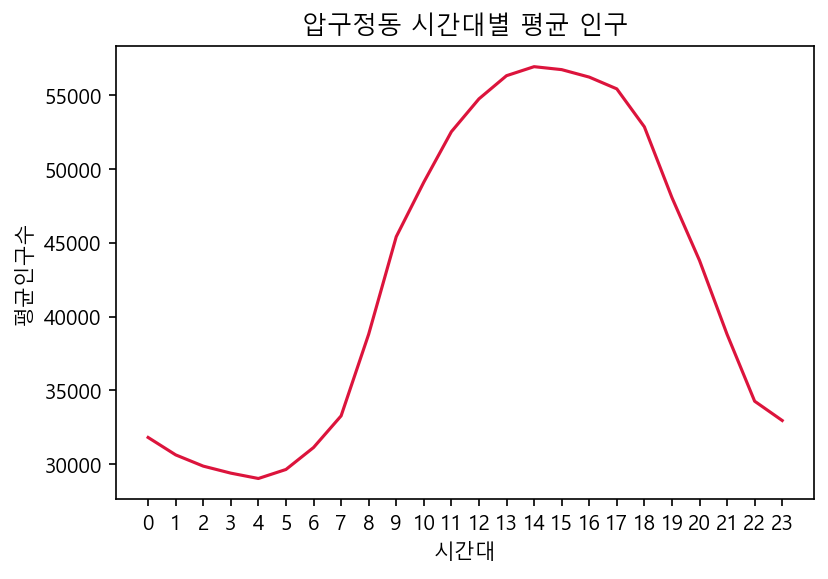

In [3]:
import matplotlib.pyplot as plt

population = [0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time, p=row[1],row[3]
        population[time]+=p
        
population=[p/31 for p in population]

plt.figure(dpi=150)
plt.rc('font',family='Malgun Gothic')
plt.title('{} 시간대별 평균 인구'.format(dong))
plt.plot(range(24),population,color='crimson')
plt.xticks(range(24),range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

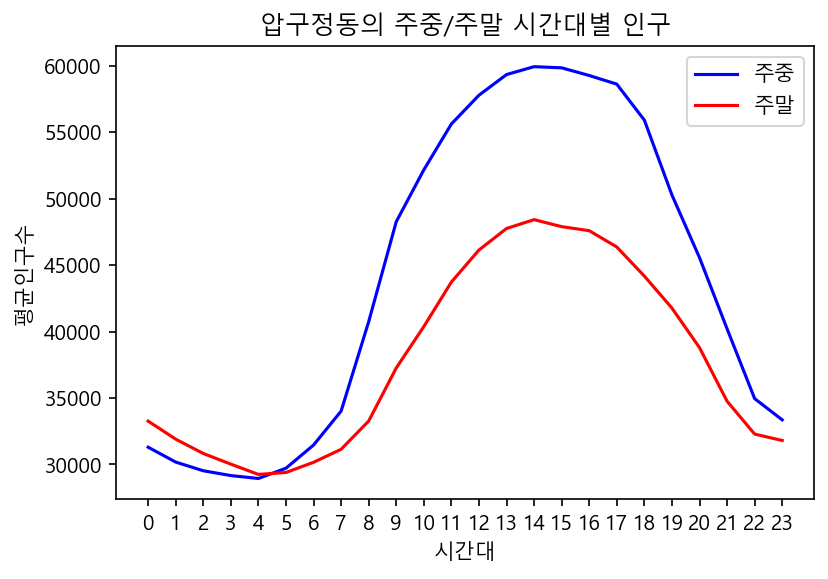

In [38]:
import datetime
import matplotlib.pyplot as plt

weekday, weekend = [0 for i in range(24)], [0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time, p=row[1],row[3]
        year=int(row[0][:4])
        month=int(row[0][4:6])
        day=int(row[0][6:8])
        if int(datetime.date(year, month, day).weekday())<5:
            weekday[time]+=p
        else:
            weekend[time]+=p

day_cnt,end_cnt=0,0

#2021년 12월의 주중/주말 일수 구하기
for row in data:
    if row[2]==dong_code:
        time, p=row[1],row[3]
        year=int(row[0][:4])
        month=int(row[0][4:6])
        day=int(row[0][6:8])
        if int(datetime.date(year, month, day).weekday())<5:
            day_cnt+=1
        else:
            end_cnt+=1
            
day_cnt, end_cnt=int(day_cnt/24),int(end_cnt/24)

weekday = [w/day_cnt for w in weekday]
weekend = [w/end_cnt for w in weekend]

plt.figure(dpi=150)
plt.xticks(range(24),range(24))
plt.rc('font',family='Malgun Gothic')
plt.title('{}의 주중/주말 시간대별 인구'.format(dong))
plt.plot(range(24),weekday,color='b',label='주중')
plt.plot(range(24),weekend,color='r',label='주말')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.show()


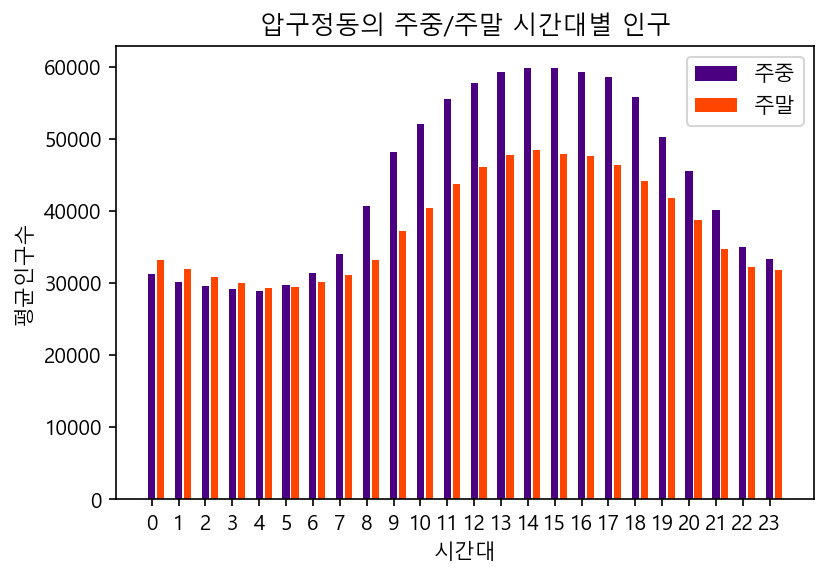

In [43]:
plt.figure(dpi=150)
plt.xticks(range(0,72,3),range(24))
plt.rc('font',family='Malgun Gothic')
plt.title('{}의 주중/주말 시간대별 인구'.format(dong))
plt.bar(range(0,72,3),weekday,color='indigo',label='주중')
plt.bar(range(1,73,3),weekend,color='orangered',label='주말')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.show()

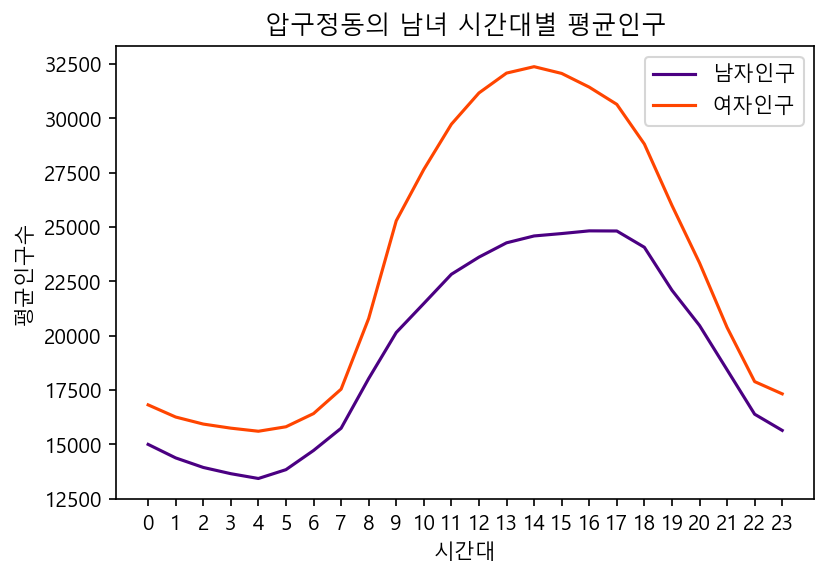

In [53]:
import matplotlib.pyplot as plt

male, female = [0 for i in range(24)], [0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        time=row[1]
        male[time] += sum(row[4:18])
        female[time] += sum(row[18:32])
male = [m/31 for m in male]
female = [f/31 for f in female]

plt.figure(dpi=150)
plt.rc('font',family='Malgun Gothic')
plt.title('{}의 남녀 시간대별 평균인구'.format(dong))
plt.plot(range(24),male,color='indigo',label='남자인구')
plt.plot(range(24),female,color='orangered',label='여자인구')
plt.xticks(range(24),range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.show()

In [20]:
import csv

#데이터 파일 읽기
f = open('LOCAL_PEOPLE_DONG_202112.csv',encoding='utf8')
data = csv.reader(f)
next(data)
data=list(data)

f2 = open('dong_code.csv',encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data=list(code_data)

#데이터 타입 변환
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])


for row in code_data:
    row[1] = int(row[1])

#행정동명과 행정동코드 입력 및 연결
dong = input('분석할 행정동을 입력하세요 -> ')

for row in code_data:
    if row[-1] == dong:
        dong_code=row[1]
print('{}을 분석합니다 - 행정동코드 : {}'.format(dong,dong_code))

#비교할 행정동명 입력
dong2 = input('비교할 행정동을 입력하세요 -> ')

for row in code_data:
    if row[-1] == dong2:
        dong_code2=row[1]
print('{}을 분석합니다 - 행정동코드 : {}'.format(dong2,dong_code2))

분석할 행정동을 입력하세요 -> 압구정동
압구정동을 분석합니다 - 행정동코드 : 11680545
비교할 행정동을 입력하세요 -> 역삼2동
역삼2동을 분석합니다 - 행정동코드 : 11680650


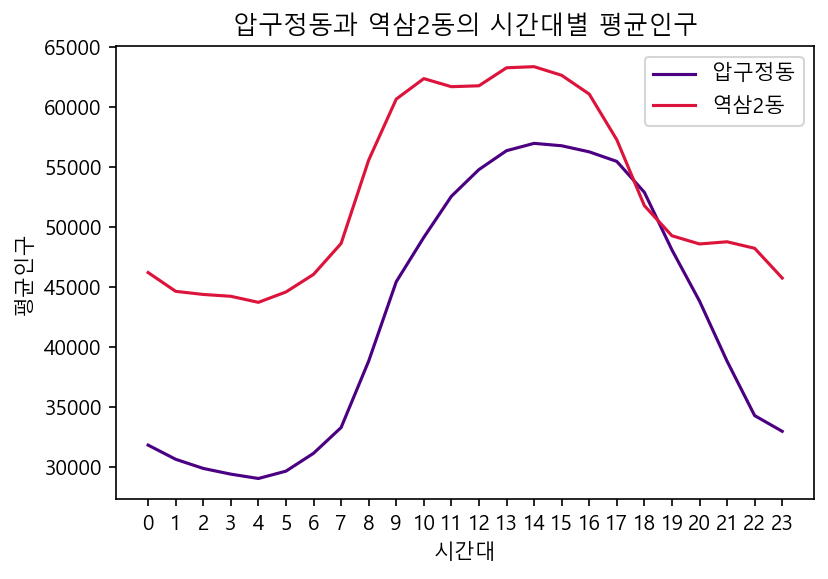

In [21]:
import matplotlib.pyplot as plt

population,population2=[0 for i in range(24)],[0 for i in range(24)]

for row in data:
    if dong_code==row[2]:
        time,p=row[1],row[3]
        population[time]+=p
    elif dong_code2==row[2]:
        time,p=row[1],row[3]
        population2[time]+=p

population = [p/31 for p in population]
population2 = [p/31 for p in population2]

plt.figure(dpi=150)
plt.rc('font',family='Malgun Gothic')
plt.title('{}과 {}의 시간대별 평균인구'.format(dong,dong2))
plt.xlabel('시간대')
plt.ylabel('평균인구')
plt.xticks(range(24),range(24))
plt.plot(range(24),population,color='indigo',label=dong)
plt.plot(range(24),population2,color='crimson',label=dong2)
plt.legend()
plt.show()